Logistical Regression

In [74]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)
y_pred_lr = logreg.predict(X_test_scaled)
print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_lr))
print(f"ROC AUC Score: {roc_auc_score(y_test, logreg.predict_proba(X_test_scaled)[:, 1]):.2f}")


Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.51      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407

ROC AUC Score: 0.83


Confusion Matrix

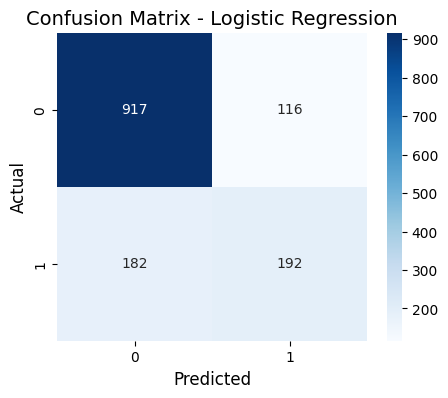

In [75]:
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression', fontsize=14)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.show()

Random Forest

In [76]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Performance:")
print(classification_report(y_test, y_pred_rf))
print(f"ROC AUC Score: {roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]):.2f}")


Random Forest Performance:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.63      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.77      0.79      0.78      1407

ROC AUC Score: 0.82


Feature Importance

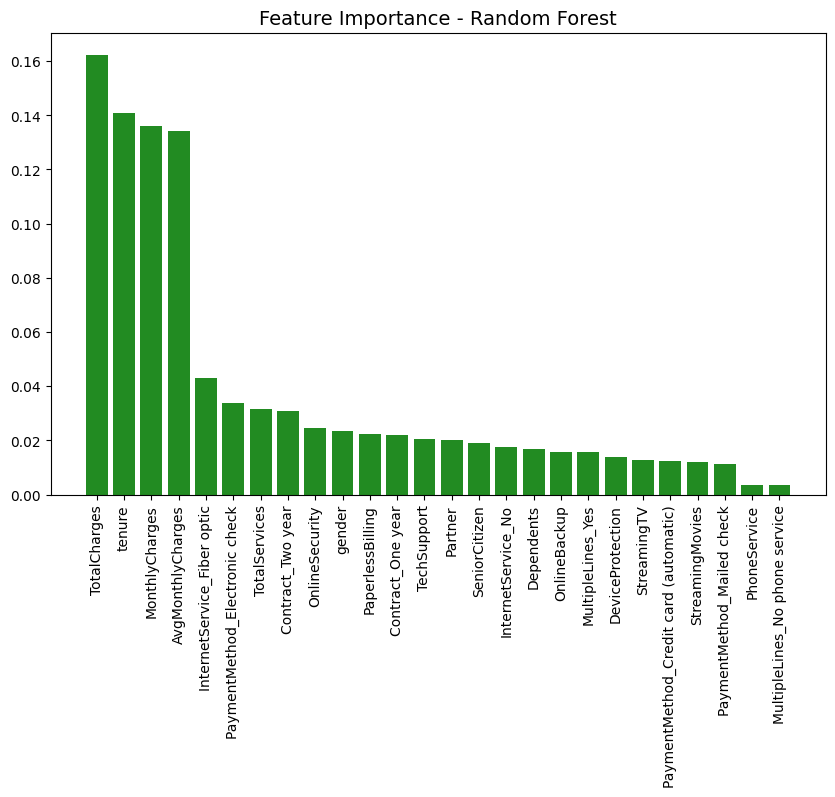

In [77]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), importances[indices], color='forestgreen')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.title('Feature Importance - Random Forest', fontsize=14)
plt.show()

Pair Plot

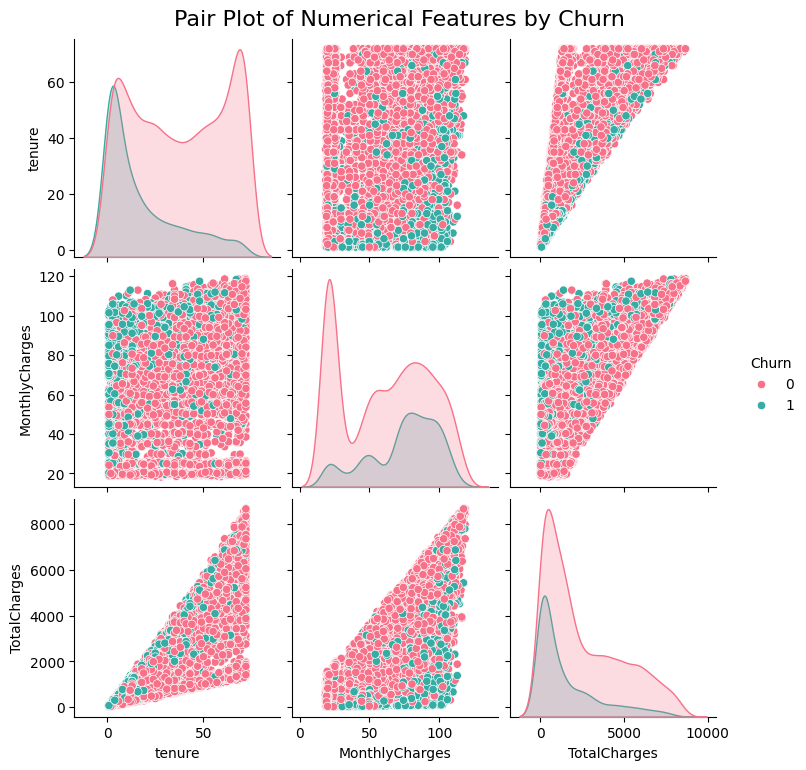

In [78]:
sns.pairplot(df[num_features + ['Churn']], hue='Churn', palette='husl', diag_kind='kde')
plt.suptitle('Pair Plot of Numerical Features by Churn', y=1.02, fontsize=16)
plt.show()

Isolation forest vs Outliers

Churn rate among outliers: 15.63%
Churn rate among normal: 27.80%


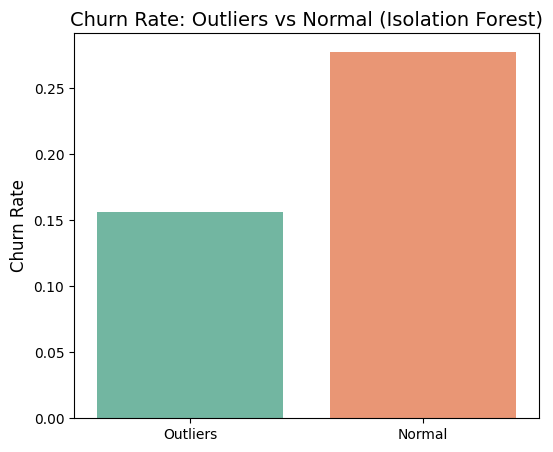

In [79]:
iso_forest = IsolationForest(contamination=0.1, random_state=42)
iso_labels = iso_forest.fit_predict(X_train)
outlier_mask = iso_labels == -1

outlier_churn_rate = y_train[outlier_mask].mean()
normal_churn_rate = y_train[~outlier_mask].mean()
print(f"Churn rate among outliers: {outlier_churn_rate:.2%}")
print(f"Churn rate among normal: {normal_churn_rate:.2%}")

plt.figure(figsize=(6, 5))
sns.barplot(x=['Outliers', 'Normal'], y=[outlier_churn_rate, normal_churn_rate], palette='Set2')
plt.title('Churn Rate: Outliers vs Normal (Isolation Forest)', fontsize=14)
plt.ylabel('Churn Rate', fontsize=12)
plt.show()


Outliers in 2D PCA

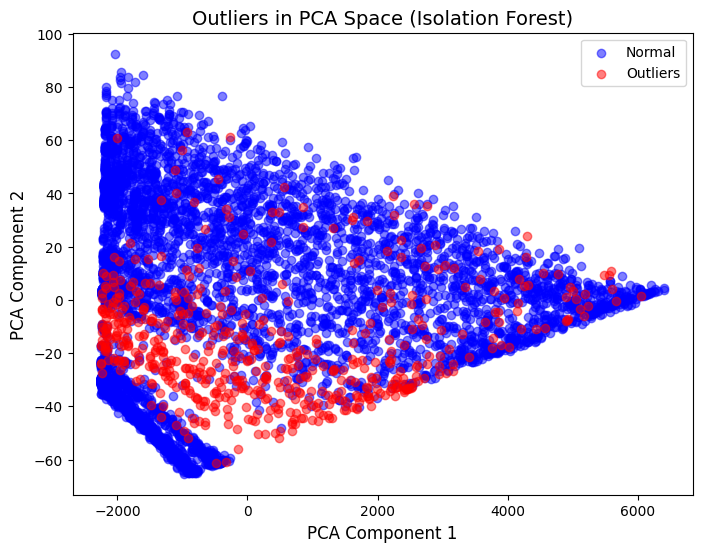

In [80]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[~outlier_mask, 0], X_pca[~outlier_mask, 1], c='blue', label='Normal', alpha=0.5)
plt.scatter(X_pca[outlier_mask, 0], X_pca[outlier_mask, 1], c='red', label='Outliers', alpha=0.5)
plt.title('Outliers in PCA Space (Isolation Forest)', fontsize=14)
plt.xlabel('PCA Component 1', fontsize=12)
plt.ylabel('PCA Component 2', fontsize=12)
plt.legend()
plt.show()